# EEP 153: Project 3
## Team Stanley Jevons: A Study of Two Different Eastern African Countries, Uganda & Tanzania

This Python notebook walks through all of our deliverables, so you can run it and check out how everything works in addition to verify we have met all of our deliverables. ***Click*** on the Table of Contents to be directed to any deliverable you want to see.

### Note to the reader: Please open this on DataHub!! The Table of Contents below will not work on Github - open and run everything with this DataHub link - [DataHub Link to this Python Notebook](https://datahub.berkeley.edu/hub/user-redirect/git-pull?repo=https://github.com/vishalival/eep153-stanley-jevons&urlpath=tree/eep153-stanley-jevons/deliverables_code_final_proj3.ipynb).

## Table of Contents and Deliverables
1. <a href="#deliverable-1a"><span style="color:red;">[Deliverable 1A]</span> - Choice of a Population, with supporting data</a>
2. <a href="#deliverable-2b"><span style="color:red;">[Deliverable 2B]</span> - Nutritional Content of Foods</a>
3. <a href="#deliverable-3b"><span style="color:red;">[Deliverable 3B]</span> - Nutritional Adequacy of Diet</a>
4. <a href="#deliverable-4a"><span style="color:red;">[Deliverable 4A]</span> - Estimate Demand System</a>
5. <a href="#deliverable-5c"><span style="color:red;">[Deliverable 5C]</span> - Counterfactual Experiments</a>

Run this code, to ensure everything runs properly. Might take an unusually long time (upper bound 1 min), sorry :O

In [1]:
# !pip install CFEDemands
import cfe
import numpy as np
from elasticity_module import output_as_pickle
import pandas as pd
import matplotlib.pyplot as plt

## 1. <span style="color:red">*Deliverable 1[A]*</span> - Choice of a Population, with Supporting Expenditure Data <a name="deliverable-1a"></a>

### Topics and Goals:

Our project focuses on East Africa, looking specifically at Uganda and Tanzania. Our project seeks to look at food consumption in both these countries, and whether the populations are meeting different dietary requirements (including but not limited to protein, vitamins etc.) We used this information to simulate different trade scenarios between the two countries that would help them gain foods and nutrients that they were deficient in, while exporting those that they had an abundance of. Additionally, we also looked at the impacts of climate change on the primary agricultural products produced in both countries 


Project Goals 

1. Explore primary agricultural production and consumption patterns in Uganda and Tanzania 
2. Determine which nutrients each country is deficient in, and which they meet requirements in 
3. Simulate food trade between the two countries to help each meet nutritional requirements 
4. Look into the effect of climate change agricultural production, and how this may impact prices and consumption patterns

In conclusion, our project shows that trade can help neighboring countries solve national nutritional deficiencies. 

We simulated a trade policy between Uganda and Tanzania, causing Kaldor Hicks improvements in the nutrition ratios of both countries. Particularly, the benefit of our trade is that Uganda’s population meeting/exceeding their protein requirements went from 58.29% → 87.71%, and Tanzania’s population meeting/exceeding their Vitamin C intake went from 23.18% → 86.09%.

![Map of East Africa](https://www.researchgate.net/publication/310007156/figure/fig1/AS:427675429937152@1478977176925/Map-of-East-Africa-Uganda-is-bordered-by-Kenya-from-the-East-Tanzania-from-the-south-and.png)

Some of the supporting expenditure data was found in the class's Edstem post, displayed here as Pandas Dataframes!

In [2]:
tanzania_expenditure = pd.read_csv("data/tanzania/Tanzania [Reformatted] - Food Expenditures (2019-20).csv")
tanzania_expenditure

,i,t,m,Cassava Fresh,Chicken,Cooking Oil,Leafy Greens,Millet & Sorghum (flour),Salt,Sugar,...,Cassava Dry/Flour,Yams/Cocoyams,"Butter, Etc.",Milk (dry or canned),Sweets,Seeds,Eggs,Nuts,Other Meat,Rice (paddy)
0,0001-001-001,2019-20,Mainland Rural,1500.0000,10400.0,875.0,1757.142857,10500.000000,200.0,700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0001-001-003,2019-20,Mainland Rural,1156.2500,NaN,875.0,1415.476190,6000.000000,200.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0001-001-004,2019-20,Dar Es Salaam,NaN,NaN,1800.0,NaN,NaN,200.0,1200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0001-004-001,2019-20,Mainland Rural,NaN,NaN,1050.0,410.000000,7500.000000,250.0,700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0001-004-002,2019-20,Mainland Other Urban,NaN,NaN,1050.0,656.250000,7428.571429,100.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,0856-001-001,2019-20,Zanzibar,NaN,NaN,NaN,NaN,NaN,NaN,6000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1106,0856-001-003,2019-20,Zanzibar,2000.0000,NaN,3000.0,NaN,NaN,160.0,2000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1107,0857-001-001,2019-20,Zanzibar,3000.0000,NaN,3000.0,NaN,NaN,NaN,2000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1108,0858-001-001,2019-20,Dar Es Salaam,NaN,NaN,540.0,500.000000,NaN,300.0,1200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
uganda_expenditure = pd.read_csv("data/uganda/Uganda - Expenditures (2019-20).csv")
uganda_expenditure

,i,t,m,Beans,Beef,Beer,Biscuits,Bongo,Bread,"Butter, etc.",...,Sugarcane,Sweet Bananas,Sweet Potatoes,Tea,Tomatoes,Waragi,Water,Wheat (flour),Yam,Yogurt
0,00c9353d8ebe42faabf5919b81d7fae7,2019-20,Eastern,3600.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4000.0,200.0,1000.0,NaN,NaN,NaN,3000.0,NaN
1,062da72d5d3a457e9336b62c8bb9096d,2019-20,Eastern,NaN,NaN,NaN,NaN,NaN,500.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0d0e29faff394154a69562b4527b48b8,2019-20,Eastern,1000.0,4500.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,800.0,NaN,NaN,NaN,NaN,NaN
3,0e03e253c35d4333a1ffad2df9d38850,2019-20,Eastern,2800.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5000.0,200.0,500.0,NaN,NaN,NaN,NaN,NaN
4,1013000201,2019-20,Central,NaN,NaN,17500.0,NaN,NaN,NaN,NaN,...,NaN,2000.0,NaN,400.0,2100.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3004,bfdf0d66403440ceab439b1e1c47cdea,2019-20,Eastern,1200.0,10000.0,NaN,NaN,2800.0,NaN,NaN,...,NaN,NaN,6000.0,100.0,1000.0,NaN,NaN,NaN,1000.0,NaN
3005,c33f6cb57d9849949e08a7350dabb829,2019-20,Central,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2000.0,200.0,1000.0,NaN,NaN,NaN,NaN,NaN
3006,d10a687889de469687377204195f3db0,2019-20,Western,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2000.0,NaN,1000.0,NaN,NaN,NaN,NaN,NaN
3007,d24fa50d02c041969a42102d8ebdadc9,2019-20,Eastern,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,30000.0,NaN,1200.0,NaN,NaN,NaN,NaN,NaN


## 2. <span style="color:red">*Deliverable 2[B]*</span> - Nutritional Content of Foods <a name="deliverable-2b"></a>


For this deliverable, our team both looked to the information provided by the Uganda dataset in addition to curating our own nutritional content of foods dataset for Tanzania. For Tanzania, we were provided expenditure, household characteristics, and food price data, but we crafted our own dataset for the nutritional content. 

For this section, our team turned to:
- US Government's Food Data Central
- Articles on Food's Nutritional Contents

However, throughout this process, our team had to make many guided assumptions as some foods were too broad to be included specifically in the FDC's database, and some foods were too vague.

Run the following cell to check out the food dataset!

In [4]:
fct = pd.read_csv("data/tanzania/Tanzania [Reformatted] - FCT.csv")
fct.head(10)

,j,Energy,Protein,Fiber,Folate,Calcium,Carbohydrate,Iron,Niacin,Riboflavin,Thiamin,Vitamin A,Vitamin B-12,Vitamin B-6,Vitamin C,Zinc
0,Cassava Fresh,1600,14.00,20.0,270,160,381.00,3.00,8.540,0.480,0.870,10,0.0,0.880,206.0,3.00
1,Chicken,2390,273.00,0.0,50,150,0.00,13.00,84.870,1.680,0.630,480,3.0,4.000,0.0,19.00
2,Cooking Oil,8840,0.00,0.0,0,0,0.00,0.00,0.000,0.000,0.000,0,0.0,0.000,0.0,0.00
3,Leafy Greens,22,1.09,0.0,0,40,4.07,0.32,0.375,0.000,0.082,0,0.0,0.071,15.2,0.31
4,Millet & Sorghum (flour),3740,109.00,90.0,840,80,721.00,30.00,46.680,2.870,4.160,0,0.0,3.800,0.0,17.00
5,Salt,0,0.00,0.0,0,50,0.00,0.00,0.000,0.000,0.000,0,0.0,0.000,0.0,0.00
6,Sugar,3870,0.00,0.0,0,10,1000.00,0.00,0.000,0.190,0.000,0,0.0,0.000,0.0,0.00
7,Tea (dry),1,0.00,0.0,5,0,0.30,0.02,0.000,0.014,0.000,0,0.0,0.000,0.0,0.02
8,0.01,27,2.85,1.6,116,68,4.07,1.26,0.551,0.194,0.077,283,0.0,0.195,26.5,0.45
9,Beef,2510,182.00,0.0,60,70,0.00,19.00,31.500,1.600,0.900,0,28.9,3.800,0.0,37.00


## 3. <span style="color:red">*Deliverable 3[B]*</span> - Nutritonal Adequacy of Diet <a name="deliverable-3b"></a>

For this section, our team used the different datasets and the work from lecture to develop nutritional adequacy means for the populations.

First, for Uganda:

In [5]:
# Reading the expenditures dataset for Uganda
x_uganda = pd.read_csv("data/uganda/Uganda - Expenditures (2019-20).csv")

# If the 'm' column is not present, add it and set its values to 1
if 'm' not in x_uganda.columns:
    x_uganda['m'] = 1

# Setting a multi-level index
x_uganda = x_uganda.set_index(['i', 't', 'm'])
x_uganda.columns.name = 'j'

# Converting all columns to numeric, coercing errors to NaN
x_uganda = x_uganda.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Replacing 0 values with NaN
x_uganda = x_uganda.replace(0, np.nan)

# Reading the household characteristics dataset for Uganda
z_uganda = pd.read_csv("data/uganda/Uganda - HH Characteristics.csv")

# If the 'm' column is not present, add it
if 'm' not in z_uganda.columns:
    z_uganda['m'] = 1

# Setting a multi-level index
z_uganda = z_uganda.set_index(['i', 't', 'm'])
z_uganda.columns.name = 'k'

# Converting all columns to numeric, coercing errors to NaN
z_uganda = z_uganda.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Reading the prices dataset for Uganda
p_uganda = pd.read_csv("data/uganda/Uganda - Prices.csv")

# If the 'm' column is not present, add it
if 'm' not in p_uganda.columns:
    p_uganda['m'] = 1

# Setting a multi-level index
p_uganda = p_uganda.set_index(['t', 'm'])
p_uganda.columns.name = 'j'

# Converting all columns to numeric, coercing errors to NaN
p_uganda = p_uganda.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Replacing 0 values with NaN
p_uganda = p_uganda.replace(0, np.nan)

# Reading the Food Consumption Table (FCT) for Uganda
fct_uganda = pd.read_csv("data/uganda/Uganda - FCT.csv")

# Setting 'j' as the index
fct_uganda = fct_uganda.set_index('j')
fct_uganda.columns.name = 'n'

# Converting all columns to numeric, coercing errors to NaN
fct_uganda = fct_uganda.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Reading the Recommended Dietary Intakes (RDI) for Uganda
rdi_uganda = pd.read_csv("data/uganda/Uganda - RDI.csv")

# Setting 'n' as the index
rdi_uganda = rdi_uganda.set_index('n')
rdi_uganda.columns.name = 'k'

# Running the CFE (Cost of Basic Needs) regression
result_uganda = cfe.Regression(y=np.log(x_uganda.stack()), d=z_uganda)

# Displaying the sorted beta values for Uganda
print("For Uganda:")
result_uganda.get_beta().sort_values(ascending=False)

For Uganda:


j
Fish (fresh)      0.886778
Milk (fresh)      0.834115
Biscuits          0.781522
Oranges           0.756571
Sorghum           0.686320
Bread             0.677132
Other Fruits      0.658992
Chapati           0.634176
Sweet Bananas     0.591652
Soda              0.586076
Other Veg.        0.585797
Sim Sim           0.563487
Rice              0.531964
Tomatoes          0.488395
Goat              0.467223
Mangos            0.463788
Fish (dried)      0.446381
Matoke            0.443616
Ground Nuts       0.426204
Beef              0.423841
Pork              0.422006
Tea               0.421568
Cooking Oil       0.416759
Maize             0.406007
Cabbages          0.403810
Waragi            0.401824
Dodo              0.369812
Millet            0.360086
Eggs              0.345383
Onions            0.340940
Sweet Potatoes    0.325598
Beans             0.316913
Peas              0.277380
Salt              0.145142
Cassava           0.142661
Name: beta, dtype: float64

Save those results.

In [6]:
result_uganda.to_pickle('./foo_uganda.pickle')

Now it's Tanzania's turn!

In [7]:
result = cfe.read_pickle('foo_uganda.pickle') 
xhat = result.predicted_expenditures()

qhat = (xhat.unstack('j')/p_uganda).dropna(how='all')

qhat = qhat.loc[:,qhat.count()>0]

use = fct_uganda.index.intersection(qhat.columns)

nutrients = qhat[use]@fct_uganda.loc[use,:]
nutrients.mean() 

z = z_uganda[rdi_uganda.columns.tolist()]

hh_rdi = z@rdi_uganda.T

hh_rwi = hh_rdi*7

use_nutrients = nutrients.columns.intersection(hh_rwi.columns)

aligned_nutrients, aligned_hh_rwi = nutrients[use_nutrients].align(hh_rwi[use_nutrients], axis=0)
nutrient_ratio_uganda = (aligned_nutrients / aligned_hh_rwi).dropna()

nutrient_ratio_uganda

,,n,Energy,Protein,Fiber,Folate,Calcium,Carbohydrate,Iron,Niacin,Riboflavin,Thiamin,Vitamin A,Vitamin B-12,Vitamin B-6,Vitamin C,Zinc
i,t,m,,,,,,,,,,,,,,,
00c9353d8ebe42faabf5919b81d7fae7,2019-20,Eastern,0.615096,0.722736,0.627115,0.736333,0.355585,1.086926,0.736215,0.664773,0.815046,0.890096,0.345513,0.473890,0.880288,1.792793,0.626514
0d0e29faff394154a69562b4527b48b8,2019-20,Eastern,0.809864,1.089355,0.771282,1.011306,0.544512,1.191057,1.010272,0.920214,1.076578,1.241203,0.456820,0.838280,1.382487,2.355469,0.917791
0e03e253c35d4333a1ffad2df9d38850,2019-20,Eastern,0.568972,0.785274,0.542669,0.720346,0.338427,0.853769,0.733177,0.646003,0.770529,0.882977,0.328414,0.610290,0.955996,1.634968,0.616956
1013000201,2019-20,Central,5.134721,5.098043,4.132305,3.873524,2.226907,7.438462,7.580828,4.557005,5.250963,6.383922,1.716840,4.348662,5.115286,7.325443,4.520410
1013000202,2019-20,Central,0.743429,1.081666,0.574476,0.776345,0.292498,0.783963,0.761054,0.761700,1.009875,1.084671,0.366327,0.999220,1.091218,1.479722,0.774717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bfdf0d66403440ceab439b1e1c47cdea,2019-20,Eastern,0.621330,0.806379,0.651366,0.829186,0.353094,0.982076,0.809916,0.685773,0.821752,0.910595,0.353696,0.567944,1.064349,2.324992,0.626486
c33f6cb57d9849949e08a7350dabb829,2019-20,Central,2.627785,2.671846,2.061023,2.015982,1.114663,3.473021,3.770880,2.266925,2.782092,3.168427,1.002933,2.563054,2.670821,3.632937,2.381274
d10a687889de469687377204195f3db0,2019-20,Western,0.658082,0.839498,0.670625,0.776954,0.320558,1.367045,1.163394,0.776283,0.891884,1.036948,0.301277,0.841180,0.998184,1.215716,0.650501


In [8]:
#z_uganda
filtered_northern_nutrient_ratio_uganda = nutrient_ratio_uganda.xs('Northern',level='m',drop_level=False)
filtered_z_uganda = z_uganda[(z_uganda['F 00-03']!=0) | (z_uganda['M 00-03']!=0)]
merged = filtered_northern_nutrient_ratio_uganda.merge(right=filtered_z_uganda, on='i')
# merged.to_csv('merged_uganda_households_w_infants.csv')
print((merged['Vitamin A'] <= 0.4).mean())
merged
#find cheapest food that increases energy

0.39123711340206185


,Energy,Protein,Fiber,Folate,Calcium,Carbohydrate,Iron,Niacin,Riboflavin,Thiamin,...,F 31-50,F 51+,M 00-03,M 04-08,M 09-13,M 14-18,M 19-30,M 31-50,M 51+,log HSize
i,,,,,,,,,,,,,,,,,,,,,
1021000701,1.665545,1.759543,1.509213,1.497386,0.838716,3.394161,1.660585,1.591910,1.821214,2.232370,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.609438
1021000701,1.665545,1.759543,1.509213,1.497386,0.838716,3.394161,1.660585,1.591910,1.821214,2.232370,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.791759
1021000701,1.665545,1.759543,1.509213,1.497386,0.838716,3.394161,1.660585,1.591910,1.821214,2.232370,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.609438
1021000701,1.665545,1.759543,1.509213,1.497386,0.838716,3.394161,1.660585,1.591910,1.821214,2.232370,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.791759
1081000201,1.241580,1.324640,1.084330,1.180715,0.722516,2.421993,2.326192,1.209809,1.452471,1.679134,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.791759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_49,1.516071,1.838223,1.461736,1.574503,0.761302,2.573189,1.750093,1.592987,1.855975,2.252759,...,0.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.609438
_60,1.657974,2.247165,1.513644,1.693621,0.773249,2.232799,1.381122,1.754513,2.104391,2.384587,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.098612
_66,1.276167,1.458125,1.177379,1.253627,0.705842,2.307670,1.597100,1.311328,1.552442,1.820696,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.386294


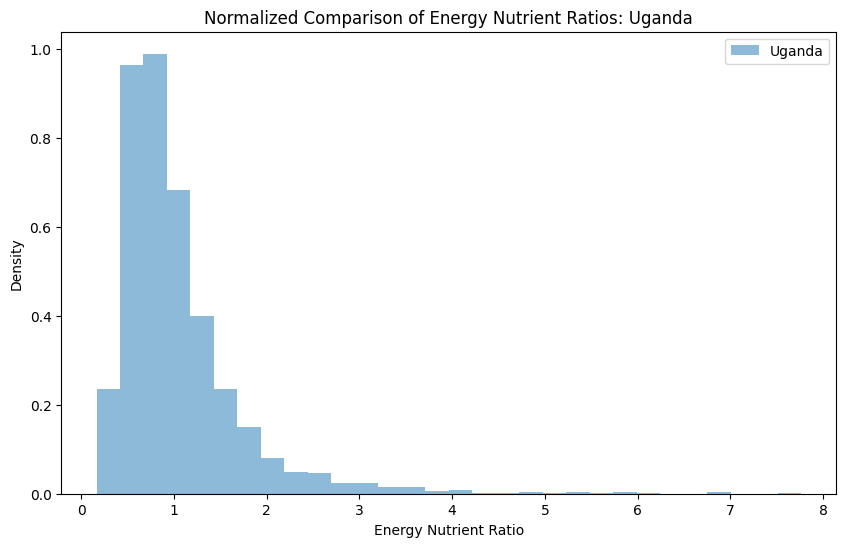

In [9]:
plt.figure(figsize=(10, 6))

# Plotting the normalized histogram for Uganda's energy nutrient ratio
plt.hist(nutrient_ratio_uganda['Energy'], bins=30, alpha=0.5, label='Uganda', density=True)

plt.title('Normalized Comparison of Energy Nutrient Ratios: Uganda')
plt.xlabel('Energy Nutrient Ratio')
plt.ylabel('Density')  # Adjusting label to 'Density' for clarity
plt.legend(loc='upper right')

plt.show()

The nutrient densities are very different, which is interesting!

What proportion of Ugandan households consume enough so that members will exceed dietary requirements?

In [10]:
nutrient_ratio_uganda

,,n,Energy,Protein,Fiber,Folate,Calcium,Carbohydrate,Iron,Niacin,Riboflavin,Thiamin,Vitamin A,Vitamin B-12,Vitamin B-6,Vitamin C,Zinc
i,t,m,,,,,,,,,,,,,,,
00c9353d8ebe42faabf5919b81d7fae7,2019-20,Eastern,0.615096,0.722736,0.627115,0.736333,0.355585,1.086926,0.736215,0.664773,0.815046,0.890096,0.345513,0.473890,0.880288,1.792793,0.626514
0d0e29faff394154a69562b4527b48b8,2019-20,Eastern,0.809864,1.089355,0.771282,1.011306,0.544512,1.191057,1.010272,0.920214,1.076578,1.241203,0.456820,0.838280,1.382487,2.355469,0.917791
0e03e253c35d4333a1ffad2df9d38850,2019-20,Eastern,0.568972,0.785274,0.542669,0.720346,0.338427,0.853769,0.733177,0.646003,0.770529,0.882977,0.328414,0.610290,0.955996,1.634968,0.616956
1013000201,2019-20,Central,5.134721,5.098043,4.132305,3.873524,2.226907,7.438462,7.580828,4.557005,5.250963,6.383922,1.716840,4.348662,5.115286,7.325443,4.520410
1013000202,2019-20,Central,0.743429,1.081666,0.574476,0.776345,0.292498,0.783963,0.761054,0.761700,1.009875,1.084671,0.366327,0.999220,1.091218,1.479722,0.774717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bfdf0d66403440ceab439b1e1c47cdea,2019-20,Eastern,0.621330,0.806379,0.651366,0.829186,0.353094,0.982076,0.809916,0.685773,0.821752,0.910595,0.353696,0.567944,1.064349,2.324992,0.626486
c33f6cb57d9849949e08a7350dabb829,2019-20,Central,2.627785,2.671846,2.061023,2.015982,1.114663,3.473021,3.770880,2.266925,2.782092,3.168427,1.002933,2.563054,2.670821,3.632937,2.381274
d10a687889de469687377204195f3db0,2019-20,Western,0.658082,0.839498,0.670625,0.776954,0.320558,1.367045,1.163394,0.776283,0.891884,1.036948,0.301277,0.841180,0.998184,1.215716,0.650501


How many people in Uganda VS Tanzania are exceeding energy goals?

In [12]:
print("For Uganda:")
print((nutrient_ratio_uganda['Energy'] >= 1).mean())


For Uganda:
0.3851576994434137


What about protein goals?

In [13]:
print("For Uganda:")
print((nutrient_ratio_uganda['Protein'] >= 1).mean())


For Uganda:
0.5829313543599258


## 4. <span style="color:red">*Deliverable 4[A]*</span> - Estimate Demand System <a name="deliverable-4a"></a>

We developed a module that would return elasticities for a given country with the data. We also did this on a wide variety of countries!

In [16]:

uganda_path_hh_characteristics = "data/uganda/Uganda - HH Characteristics.csv"
uganda_path_expenditure = "data/uganda/Uganda - Expenditures (2019-20).csv"

Let's try the function `output_as_pickle`, that will return the pickled elasticities!

In [18]:
output_as_pickle(uganda_path_expenditure, uganda_path_hh_characteristics, "data/uganda.pickle")

/Users/cnicholas/src/EEP153/team_Luther_Tweetan/elasticity_module.py:12: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  x = x.groupby('j',axis=1).sum()


Now, to use our results ...

In [21]:
result_uganda = cfe.regression.read_pickle("data/uganda.pickle")

Text(0.5, 1.0, 'Uganda Elasticity by Food, sorted')

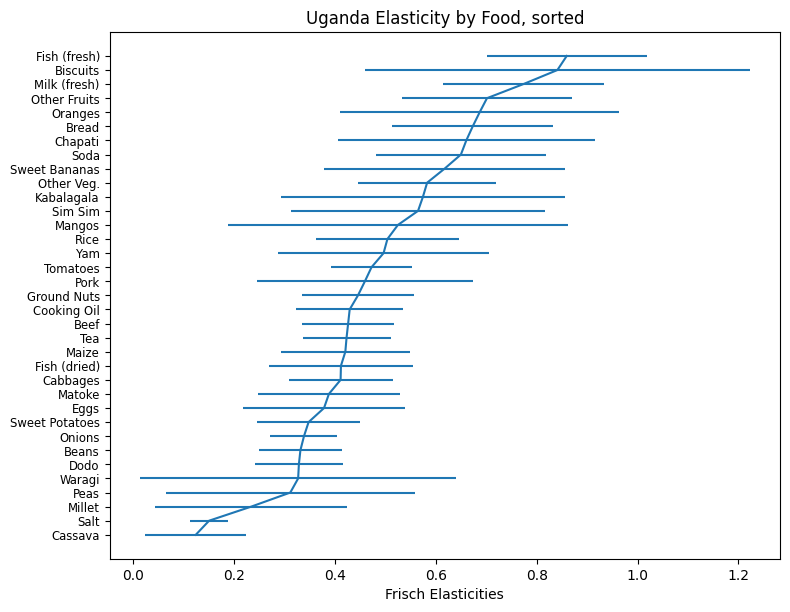

In [22]:
result_uganda.graph_beta()
plt.title("Uganda Elasticity by Food, sorted")

For Uganda, this is how consumption will vary with household need, based on the breakdown of people in the household.

In [ ]:
result_uganda.get_gamma()

k,F 00-03,F 04-08,F 09-13,F 14-18,F 19-30,F 31-50,F 51+,M 00-03,M 04-08,M 09-13,M 14-18,M 19-30,M 31-50,M 51+,log HSize,Constant
j,,,,,,,,,,,,,,,,
Beans,-0.129845,0.024727,0.064567,-0.028448,-0.002598,0.029310,0.084417,-0.071322,0.020194,0.036715,0.049218,0.042955,0.011466,0.107460,0.426698,8.409504
Beef,-0.121810,0.046408,0.033906,0.022340,0.084701,0.093669,0.222188,-0.008614,0.026050,0.016648,0.055342,0.080857,0.196879,0.148855,0.122587,9.262532
Biscuits,-0.068814,-0.131646,-0.041326,0.101954,-0.122081,0.295563,0.287443,0.270660,-0.033024,-0.136711,-0.181973,-0.019032,-0.115969,-0.374188,0.279835,6.792856
Bread,-0.015413,0.046979,-0.053303,0.016995,0.054328,0.073295,0.134078,-0.061955,0.100468,0.014863,0.043759,0.054900,0.172740,0.106329,0.212862,8.285099
Cabbages,0.000047,-0.052952,0.034075,0.024258,-0.010929,0.031573,0.057126,-0.049127,0.035070,0.004137,0.052812,0.084709,0.018162,0.054391,0.203897,7.044567
Cassava,0.024785,0.087112,0.099496,0.046304,0.021227,0.049439,0.138227,0.008328,0.137877,0.190429,0.158452,0.067733,0.103726,0.134321,0.157361,8.437182
Chapati,-0.060105,-0.020808,0.063681,0.090755,-0.024146,0.013664,-0.073183,0.000267,0.047077,-0.045219,-0.043024,0.076034,0.138217,0.134401,0.209899,7.644030
Cooking Oil,-0.088183,-0.049166,-0.050817,0.017481,0.005940,-0.005681,-0.081625,-0.112399,-0.077558,-0.039460,-0.007269,-0.042908,-0.006277,0.036738,0.419226,7.262257
Dodo,-0.068655,0.003535,0.112343,0.053806,0.044161,0.075993,0.195738,-0.022117,0.035598,0.080625,0.009036,0.032212,0.084695,0.194343,0.140041,7.233421


For Tanzania, this is how consumption will vary by household need.

## 7. <span style="color:red">*Deliverable 5[C]*</span> - Counterfactual Experiments <a name="deliverable-5c"></a>

First, we wanted to see how nutrition would change it we doubled expenditures for Uganda.

In [23]:
x_uganda_doubled = x_uganda * 2

# Running the CFE regression with the doubled expenditures
result_uganda_doubled = cfe.Regression(y=np.log(x_uganda_doubled.stack()), d=z_uganda)

# Displaying the sorted beta values with doubled expenditures
print("For Uganda with doubled food expenditures:")
result_uganda_doubled.get_beta().sort_values(ascending=False)

For Uganda with doubled food expenditures:


j
Fish (fresh)      0.886778
Milk (fresh)      0.834115
Biscuits          0.781522
Oranges           0.756571
Sorghum           0.686320
Bread             0.677132
Other Fruits      0.658992
Chapati           0.634176
Sweet Bananas     0.591652
Soda              0.586076
Other Veg.        0.585797
Sim Sim           0.563487
Rice              0.531964
Tomatoes          0.488395
Goat              0.467223
Mangos            0.463788
Fish (dried)      0.446381
Matoke            0.443616
Ground Nuts       0.426204
Beef              0.423841
Pork              0.422006
Tea               0.421568
Cooking Oil       0.416759
Maize             0.406007
Cabbages          0.403810
Waragi            0.401824
Dodo              0.369812
Millet            0.360086
Eggs              0.345383
Onions            0.340940
Sweet Potatoes    0.325598
Beans             0.316913
Peas              0.277380
Salt              0.145142
Cassava           0.142661
Name: beta, dtype: float64

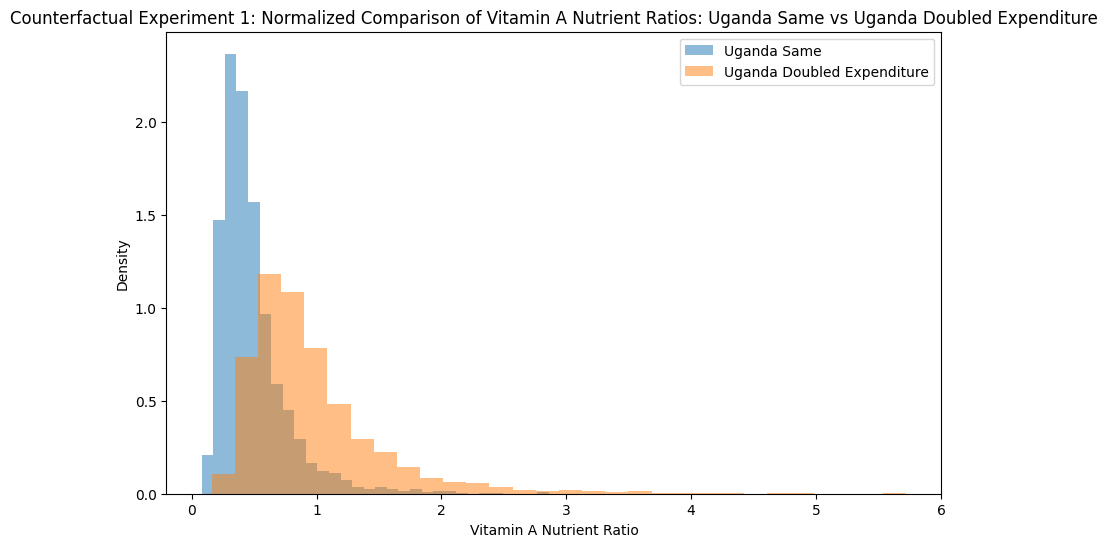

In [28]:
xhat = result_uganda_doubled.predicted_expenditures()

qhat = (xhat.unstack('j')/p_uganda).dropna(how='all')

qhat = qhat.loc[:,qhat.count()>0]

use = fct_uganda.index.intersection(qhat.columns)

nutrients = qhat[use]@fct_uganda.loc[use,:]
nutrients.mean() 

z = z_uganda[rdi_uganda.columns.tolist()]

hh_rdi = z@rdi_uganda.T

hh_rwi = hh_rdi*7

use_nutrients = nutrients.columns.intersection(hh_rwi.columns)

nutrient_ratio_uganda_doubled = (nutrients[use_nutrients]/hh_rwi[use_nutrients]).dropna()

plt.figure(figsize=(10, 6))

# Plotting the normalized histogram for Uganda's energy nutrient ratio
plt.hist(nutrient_ratio_uganda['Vitamin A'], bins=30, alpha=0.5, label='Uganda Same', density=True)

# Plotting the normalized histogram for Tanzania's energy nutrient ratio
plt.hist(nutrient_ratio_uganda_doubled['Vitamin A'], bins=30, alpha=0.5, label='Uganda Doubled Expenditure', density=True)


plt.title('Counterfactual Experiment 1: Normalized Comparison of Vitamin A Nutrient Ratios: Uganda Same vs Uganda Doubled Expenditure')
plt.xlabel('Vitamin A Nutrient Ratio')
plt.ylabel('Density')  # Adjusting label to 'Density' for clarity
plt.legend(loc='upper right')

plt.show()

First, if we uniformly inject 40000 Ugandan Shillings per household into the beef budget, how will this benefit Ugandan Protein consumption?

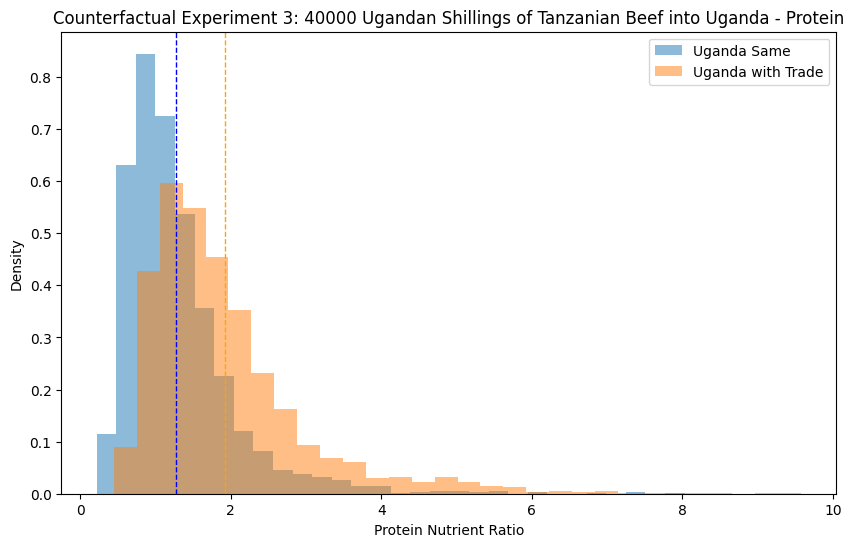

In [30]:
result_uganda = cfe.Regression(y=np.log(x_uganda.stack()), d=z_uganda)

xhat = result_uganda.predicted_expenditures()

xhat.loc[xhat.index.get_level_values('j') == 'Beef'] += 40000

qhat = (xhat.unstack('j')/p_uganda).dropna(how='all')

qhat = qhat.loc[:,qhat.count()>0]

use = fct_uganda.index.intersection(qhat.columns)

nutrients = qhat[use]@fct_uganda.loc[use,:]
nutrients.mean() 

z = z_uganda[rdi_uganda.columns.tolist()]

hh_rdi = z@rdi_uganda.T

hh_rwi = hh_rdi*7

use_nutrients = nutrients.columns.intersection(hh_rwi.columns)

nutrient_ratio_uganda_2 = (nutrients[use_nutrients]/hh_rwi[use_nutrients]).dropna()

plt.figure(figsize=(10, 6))

plt.hist(nutrient_ratio_uganda['Protein'], bins=30, alpha=0.5, label='Uganda Same', density=True)
plt.axvline(nutrient_ratio_uganda['Protein'].mean(), color='blue', linestyle='dashed', linewidth=1)

plt.hist(nutrient_ratio_uganda_2['Protein'], bins=30, alpha=0.5, label='Uganda with Trade', density=True)
plt.axvline(nutrient_ratio_uganda_2['Protein'].mean(), color='orange', linestyle='dashed', linewidth=1)

plt.title('Counterfactual Experiment 3: 40000 Ugandan Shillings of Tanzanian Beef into Uganda - Protein')
plt.xlabel('Protein Nutrient Ratio')
plt.ylabel('Density') 
plt.legend(loc='upper right')

plt.show()

Overall, our counterfactual experiments point to one policy idea that can solve two big problems:

- Problem 1: Tanzanians do not get enough Vitamin C.
- Problem 2: Ugandans do not get enough Protein.

Our solution:

- Tanzanians trade beef into Uganda, Ugandas trade Cassava into Tanzania.

The solution's simulated predictions:

- Both Uganda and Tanzania achieving average nutrient ratios greater than 1 for both protein and Vitamin C.

**Conclusion: Trade can help neighboring countries solve national nutritional deficiencies.**